In [4]:
#import os
import re
import pandas as pd
import os
import openpyxl
# pd.set_option('display.max_rows', None)

import numpy as np
import nltk


from matplotlib import pyplot as plt
from konlpy.tag import Okt
from wordcloud import WordCloud
from gensim.corpora.dictionary import Dictionary

from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

# import warnings
# warnings.filterwarnings('ignore', category = DeprecationWarning) # pyLDAvis.display 설치 후 발생

#import platform
# import csv
# import time
# import pyLDAvis.gensim


In [5]:
list_file = os.listdir("C:/Users/User/anaconda3/envs/NLP37/news/game/BigKinds/")

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'C:/Users/User/anaconda3/envs/NLP37/news/game/BigKinds/'

In [3]:
# list_file

In [4]:
index = 0
df_original_BigKinds = pd.DataFrame(columns = ['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합분류1', '통합분류2', '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드', '특성추출(가중치순 상위 50개)', '본문', 'URL', '분석제외 여부'])

for file in list_file:
    index += 1    
    try:
        df_original_BigKinds_temp = pd.read_excel("C:/Users/User/anaconda3/envs/NLP37/news/game/BigKinds/"+ file, engine='openpyxl')
        df_original_BigKinds = pd.concat([df_original_BigKinds, df_original_BigKinds_temp])
    except Exception as e:
        print(e)

C:\Users\User\anaconda3\envs\NLP37\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [5]:
df_BigKinds = df_original_BigKinds[['일자', '키워드', '특성추출(가중치순 상위 50개)']]
df_BigKinds.rename(columns = {'키워드':'단어', '특성추출(가중치순 상위 50개)':'키워드'}, inplace = True)

C:\Users\User\anaconda3\envs\NLP37\lib\site-packages\pandas\core\frame.py:5042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
df_BigKinds.to_csv('C:/Users/User/anaconda3/envs/NLP37/news/game/BigKinds_game_keyword.txt', sep = '\t', header=True, index = False)  

In [2]:
df_BigKinds = pd.read_csv('C:/Users/User/anaconda3/envs/NLP37/news/game/BigKinds_game_keyword.txt', sep = '\t')

In [3]:
df_BigKinds

,일자,단어,키워드
0,20210822,"소셜,카지노,게임,합법,일자리,창출,수익,모델,제한,소셜,카지노,게임,웹보드,규제,...","웹보드,이용자,소셜,넷마블,게임사,과몰입,전성민,독일,스핀엑스,1만,합법화,오프라인..."
1,20210819,"교계,시민단체,게임이용자보호센터,전락,게임업,나팔수,중독예방시민연대,게임이용자보호시...","문광부,이용자,게임문화재단,불법환전,게임업계,웹보드게임,게임업,게임사,게임이용자보호..."
2,20210818,"도박,논란,김이브,복귀,하룻밤,300만,스폰,제안,김이브,유명,BJ,본명,김소진,복...","김이브,스폰,유튜버,인스타그램,녹취록,비고라이브,300만,카톡,게시물,bj,목요일,..."
3,20210813,"2분기,게임사,희비,게임,실적,막바지,전반적,코로나19,역대급,실적,기저,효과,저조...","영업이익,당기순이익,베스파,일본,미국,순이익,게임사,온라인,자회사,중국,디즈니,엠게..."
4,20210813,"NHN,최대,매출,사상,NHN,2분기,매출,역대,최고,영업이익,1년,감소,NHN,2...","영업이익,nhn,오프라인,정우진,지급결제,자회사,1962억,페이코,비수기,웹보드,계..."
...,...,...,...
1565,20160117,"NHN,엔터,클라우드,적자,탈피,게임,병원,게임,학교,기업,방침,서비스,확장,NHN...","클라우드,페이코,이용자,캐시카우,본부장,신사업,토스트캠,웹보드게임,진은숙,nhn,사..."
1566,20160113,"성매매,사행성,게임,범죄,수익,몰수,경찰,몰수,성매매,업소,사행,게임장,범죄,수익,...","사행성,게임장,성매매,94건,3천만,견인차들,단독영상,견인차,역주행,400만,경찰청..."
1567,20160111,"빈집털이,복권,30대,구속,농촌,마을,빈집,복권,탕진,30대,결국,경찰,공포탄,추격...","고씨,빈집,복권방,공포탄,제주시,구좌읍,30대,제주,택시운전,덤프트럭,성산읍,430..."
1568,20160105,"영입,김병관,웹젠,정규,검증,팩트체커,제보,제안,메일,더불어민주당,김병관,정규,해결...","웹젠,비정규직,김병관,관계자,흙수저,한게임,nhn게임스,정규직,판교,더불어민주당,자..."


In [4]:
# month column 생성
df_BigKinds['연도'] = df_BigKinds['일자'].astype(str).str.slice(start=0, stop=4)
df_BigKinds['월'] = df_BigKinds['일자'].astype(str).str.slice(start=4, stop=6)

In [5]:
df_BigKinds

,일자,단어,키워드,연도,월
0,20210822,"소셜,카지노,게임,합법,일자리,창출,수익,모델,제한,소셜,카지노,게임,웹보드,규제,...","웹보드,이용자,소셜,넷마블,게임사,과몰입,전성민,독일,스핀엑스,1만,합법화,오프라인...",2021,08
1,20210819,"교계,시민단체,게임이용자보호센터,전락,게임업,나팔수,중독예방시민연대,게임이용자보호시...","문광부,이용자,게임문화재단,불법환전,게임업계,웹보드게임,게임업,게임사,게임이용자보호...",2021,08
2,20210818,"도박,논란,김이브,복귀,하룻밤,300만,스폰,제안,김이브,유명,BJ,본명,김소진,복...","김이브,스폰,유튜버,인스타그램,녹취록,비고라이브,300만,카톡,게시물,bj,목요일,...",2021,08
3,20210813,"2분기,게임사,희비,게임,실적,막바지,전반적,코로나19,역대급,실적,기저,효과,저조...","영업이익,당기순이익,베스파,일본,미국,순이익,게임사,온라인,자회사,중국,디즈니,엠게...",2021,08
4,20210813,"NHN,최대,매출,사상,NHN,2분기,매출,역대,최고,영업이익,1년,감소,NHN,2...","영업이익,nhn,오프라인,정우진,지급결제,자회사,1962억,페이코,비수기,웹보드,계...",2021,08
...,...,...,...,...,...
1565,20160117,"NHN,엔터,클라우드,적자,탈피,게임,병원,게임,학교,기업,방침,서비스,확장,NHN...","클라우드,페이코,이용자,캐시카우,본부장,신사업,토스트캠,웹보드게임,진은숙,nhn,사...",2016,01
1566,20160113,"성매매,사행성,게임,범죄,수익,몰수,경찰,몰수,성매매,업소,사행,게임장,범죄,수익,...","사행성,게임장,성매매,94건,3천만,견인차들,단독영상,견인차,역주행,400만,경찰청...",2016,01
1567,20160111,"빈집털이,복권,30대,구속,농촌,마을,빈집,복권,탕진,30대,결국,경찰,공포탄,추격...","고씨,빈집,복권방,공포탄,제주시,구좌읍,30대,제주,택시운전,덤프트럭,성산읍,430...",2016,01
1568,20160105,"영입,김병관,웹젠,정규,검증,팩트체커,제보,제안,메일,더불어민주당,김병관,정규,해결...","웹젠,비정규직,김병관,관계자,흙수저,한게임,nhn게임스,정규직,판교,더불어민주당,자...",2016,01


In [6]:
df_BigKinds.groupby(['연도','월']).count()

일자  단어  키워드
연도   월              
2016 01  24  24   24
     02  64  64   64
     03  19  19   19
     04  14  14   14
     05  52  52   52
...      ..  ..  ...
2021 04  12  12   12
     05  14  14   14
     06  12  12   12
     07  16  16   16
     08  25  25   25

[68 rows x 3 columns]

In [7]:
df_BigKinds['키워드'] = df_BigKinds['키워드'].str.split(',')
df_BigKinds['단어'] = df_BigKinds['단어'].str.split(',')

In [8]:
df_BigKinds

,일자,단어,키워드,연도,월
0,20210822,"[소셜, 카지노, 게임, 합법, 일자리, 창출, 수익, 모델, 제한, 소셜, 카지노...","[웹보드, 이용자, 소셜, 넷마블, 게임사, 과몰입, 전성민, 독일, 스핀엑스, 1...",2021,08
1,20210819,"[교계, 시민단체, 게임이용자보호센터, 전락, 게임업, 나팔수, 중독예방시민연대, ...","[문광부, 이용자, 게임문화재단, 불법환전, 게임업계, 웹보드게임, 게임업, 게임사...",2021,08
2,20210818,"[도박, 논란, 김이브, 복귀, 하룻밤, 300만, 스폰, 제안, 김이브, 유명, ...","[김이브, 스폰, 유튜버, 인스타그램, 녹취록, 비고라이브, 300만, 카톡, 게시...",2021,08
3,20210813,"[2분기, 게임사, 희비, 게임, 실적, 막바지, 전반적, 코로나19, 역대급, 실...","[영업이익, 당기순이익, 베스파, 일본, 미국, 순이익, 게임사, 온라인, 자회사,...",2021,08
4,20210813,"[NHN, 최대, 매출, 사상, NHN, 2분기, 매출, 역대, 최고, 영업이익, ...","[영업이익, nhn, 오프라인, 정우진, 지급결제, 자회사, 1962억, 페이코, ...",2021,08
...,...,...,...,...,...
1565,20160117,"[NHN, 엔터, 클라우드, 적자, 탈피, 게임, 병원, 게임, 학교, 기업, 방침...","[클라우드, 페이코, 이용자, 캐시카우, 본부장, 신사업, 토스트캠, 웹보드게임, ...",2016,01
1566,20160113,"[성매매, 사행성, 게임, 범죄, 수익, 몰수, 경찰, 몰수, 성매매, 업소, 사행...","[사행성, 게임장, 성매매, 94건, 3천만, 견인차들, 단독영상, 견인차, 역주행...",2016,01
1567,20160111,"[빈집털이, 복권, 30대, 구속, 농촌, 마을, 빈집, 복권, 탕진, 30대, 결...","[고씨, 빈집, 복권방, 공포탄, 제주시, 구좌읍, 30대, 제주, 택시운전, 덤프...",2016,01
1568,20160105,"[영입, 김병관, 웹젠, 정규, 검증, 팩트체커, 제보, 제안, 메일, 더불어민주당...","[웹젠, 비정규직, 김병관, 관계자, 흙수저, 한게임, nhn게임스, 정규직, 판교...",2016,01


In [9]:
list_of_lists_keyword = df_BigKinds['키워드'].tolist()
list_of_lists_noun = df_BigKinds['단어'].tolist()

In [10]:
# 불용어 삭제

# f = open('C:/Users/User/anaconda3/envs/NLP37/news/TF/venture_stopword_list.txt', 'r')
# lines = f.readlines()
# list_stopword = []

# for line in lines:
#     line = line.replace('\n', '')
#     list_stopword.append(line)
# f.close()

In [16]:
# def cleaning(list_of_lists, list_stopword):
#     list_of_lists_left = []
#     for list_noun in list_of_lists:
#         list_left = [noun for noun in list_noun if noun not in list_stopword]
#         list_of_lists_left.append(list_left)
#     return list_of_lists_left

In [17]:
# list_of_lists_keyword = cleaning(list_of_lists_keyword, list_stopword)
# list_of_lists_noun = cleaning(list_of_lists_noun, list_stopword)

In [10]:
# list of lists 병합

list_keyword = []
rows = len(list_of_lists_keyword)

i = 0
while i < rows:
    list_keyword += list_of_lists_keyword[i]
    i += 1    

list_noun = []
rows = len(list_of_lists_noun)

i = 0
while i < rows:
    list_noun += list_of_lists_noun[i]
    i += 1    

In [11]:
# wordcount_BigKinds = nltk.Text(list_nouns)
wordcount_BigKinds_game_keyword = nltk.Text(list_keyword)
print(wordcount_BigKinds_game_keyword.vocab().most_common(20))
wordcount_BigKinds_game_noun = nltk.Text(list_noun)
print(wordcount_BigKinds_game_noun.vocab().most_common(20))

[('웹보드', 383), ('nhn', 378), ('페이코', 303), ('온라인', 302), ('이용자', 244), ('영업이익', 228), ('연구원', 210), ('매출액', 203), ('게임', 198), ('일본', 183), ('목표주가', 179), ('한국', 164), ('관계자', 153), ('중국', 152), ('위원회', 150), ('네오위즈', 143), ('게임물', 133), ('웹보드게임', 131), ('게임사', 130), ('pc', 129)]
[('게임', 11948), ('매출', 3647), ('규제', 2606), ('대비', 2326), ('증가', 1916), ('모바일', 1853), ('도박', 1791), ('시장', 1728), ('NHN', 1606), ('사업', 1548), ('출시', 1478), ('기록', 1347), ('결제', 1332), ('성장', 1321), ('전년', 1317), ('불법', 1212), ('웹보드', 1210), ('투자', 1193), ('실적', 1154), ('페이코', 1140)]


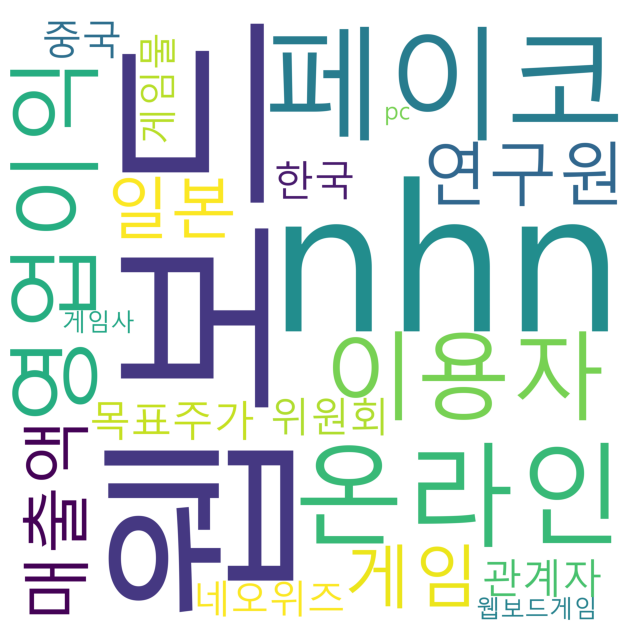

In [13]:
most_common_words = wordcount_BigKinds_game_keyword.vocab().most_common(20)

# for window : font_path='c:/Windows/Fonts/malgun.ttf'
# for mac : font_path='/Library/Fonts/AppleGothic.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling = 0.2,
                     background_color = 'white',
                     width = 3000, height = 3000,
                     max_words = 100).generate_from_frequencies(dict(most_common_words))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

wordcloud.to_file('C:/Users/User/anaconda3/envs/NLP37/news/game/BigKinds_game_keyword_wordcloud.png')

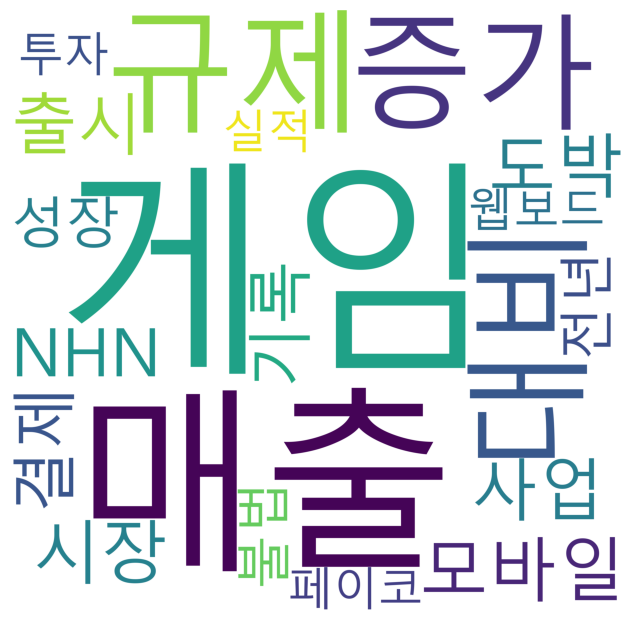

In [14]:
most_common_words = wordcount_BigKinds_game_noun.vocab().most_common(20)

# for window : font_path='c:/Windows/Fonts/malgun.ttf'
# for mac : font_path='/Library/Fonts/AppleGothic.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling = 0.2,
                     background_color = 'white',
                     width = 3000, height = 3000,
                     max_words = 100).generate_from_frequencies(dict(most_common_words))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

wordcloud.to_file('C:/Users/User/anaconda3/envs/NLP37/news/game/BigKinds_game_noun_wordcloud.png')

In [12]:
keyword_dictionary = Dictionary(list_of_lists_keyword)
keyword_corpus = [keyword_dictionary.doc2bow(text) for text in list_of_lists_keyword]
# 출처: 서대호(2019), 잡아라! 텍스트마이닝 with 파이썬

In [13]:
print(keyword_dictionary)

Dictionary(8166 unique tokens: ['1만', '게임사', '과몰입', '넷마블', '독일']...)


In [15]:
keyword_coherences=[]
keyword_perplexities=[]

for i in range(1, 21):

    num_topics = i
#     tic = time.time()
    lda_model = LdaMulticore(corpus = keyword_corpus, id2word = keyword_dictionary, num_topics = num_topics, passes = 1)
#    print('number of topics',p,time.time() - tic)
    coherence_model = CoherenceModel(model = lda_model, corpus = keyword_corpus, coherence = 'u_mass')
    keyword_coherence = coherence_model.get_coherence()
    print("coherence:", keyword_coherence)
    keyword_coherences.append(keyword_coherence)
    print("perplexity:", lda_model.log_perplexity(keyword_corpus), "\n")
    keyword_perplexities.append(lda_model.log_perplexity(keyword_corpus))

coherence: -3.0580481733224634
perplexity: -8.133726000141237 

coherence: -3.404412358533439
perplexity: -8.287342439288356 

coherence: -4.148860403360264
perplexity: -8.32654747007676 

coherence: -4.167971754772747
perplexity: -8.397761707167781 

coherence: -4.292976614322192
perplexity: -8.450060396378626 

coherence: -4.463274036370982
perplexity: -8.48123960930194 

coherence: -5.094881245660463
perplexity: -8.536351364423606 

coherence: -4.213519280345179
perplexity: -8.587996960607123 

coherence: -3.9772686995457054
perplexity: -8.595348368383675 

coherence: -5.022373777156227
perplexity: -8.64215127862871 

coherence: -4.454714206105582
perplexity: -8.652507169717104 

coherence: -4.307193101275083
perplexity: -8.733835923965993 

coherence: -4.756382227561785
perplexity: -8.763824944968588 

coherence: -4.464662350474971
perplexity: -8.809341569379235 

coherence: -4.631912516928368
perplexity: -8.813190716375932 

coherence: -4.509875523423212
perplexity: -8.88286445204

In [16]:
with open('C:/Users/User/anaconda3/envs/NLP37/news/game/game_keyword_coherences.txt', 'w') as f:
    for coherence_value in keyword_coherences:
        f.write(str(coherence_value) +'\n')

with open('C:/Users/User/anaconda3/envs/NLP37/news/game/game_keyword_perplexities.txt', 'w') as f:
    for perplexity_score in keyword_perplexities:
        f.write(str(perplexity_score) +'\n')

In [17]:
keyword_coherences = []
with open('C:/Users/User/anaconda3/envs/NLP37/news/game/game_keyword_coherences.txt', 'r') as f:
    keyword_coherences = [value.rstrip() for value in f.readlines()]
    
keyword_coherences = [float(i) for i in keyword_coherences]

keyword_perplexities = []
with open('C:/Users/User/anaconda3/envs/NLP37/news/game/game_keyword_perplexities.txt', 'r') as f:
    keyword_perplexities = [value.rstrip() for value in f.readlines()]
    
keyword_perplexities = [float(i) for i in keyword_perplexities]

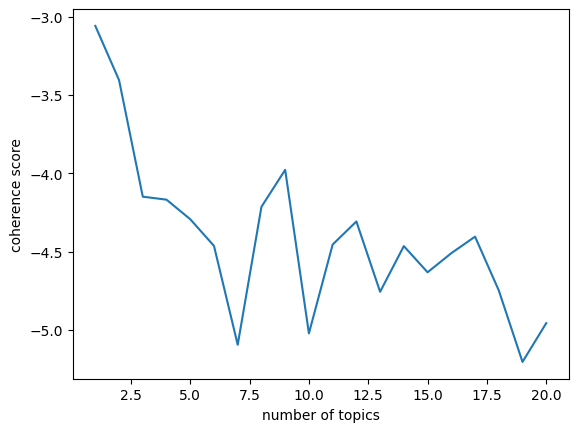

In [18]:
x = np.arange(1,21)
plt.plot(x, keyword_coherences)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.savefig("C:/Users/User/anaconda3/envs/NLP37/news/game/keyword_game_coherence.png")
plt.show()

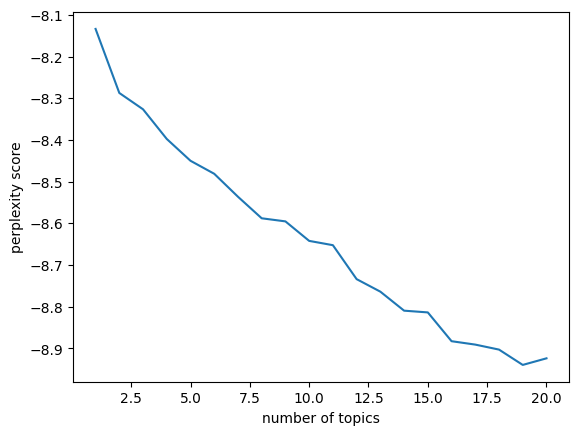

In [19]:
x = np.arange(1,21)
plt.plot(x, keyword_perplexities)
plt.xlabel("number of topics")
plt.ylabel("perplexity score")
plt.savefig("C:/Users/User/anaconda3/envs/NLP37/news/game/keyword_game_perplexity.png")
plt.show()

In [44]:
keyword_lda_model = LdaMulticore(corpus = keyword_corpus, num_topics = 9, id2word = keyword_dictionary, passes = 1)
topics = keyword_lda_model.print_topics()
for topic in topics:
    print(topic)

(0, '0.014*"nhn" + 0.013*"웹보드" + 0.012*"이용자" + 0.009*"페이코" + 0.009*"연구원" + 0.009*"웹보드게임" + 0.008*"게임" + 0.007*"관계자" + 0.007*"목표주가" + 0.006*"위원회"')
(1, '0.011*"nhn" + 0.011*"페이코" + 0.010*"온라인" + 0.010*"웹보드" + 0.007*"000" + 0.006*"이용자" + 0.006*"엔터" + 0.006*"비수기" + 0.005*"일본" + 0.005*"게임"')
(2, '0.017*"온라인" + 0.016*"nhn" + 0.013*"페이코" + 0.009*"웹보드" + 0.008*"영업이익" + 0.007*"이용자" + 0.007*"게임사" + 0.007*"관계자" + 0.007*"일본" + 0.006*"비수기"')
(3, '0.010*"웹보드" + 0.007*"이용자" + 0.006*"게임" + 0.006*"매출액" + 0.006*"위원회" + 0.005*"목표주가" + 0.005*"게임물" + 0.005*"네오위즈" + 0.005*"사행성" + 0.005*"게임사"')
(4, '0.007*"000" + 0.006*"이용자" + 0.006*"게임" + 0.006*"웹보드" + 0.006*"온라인" + 0.006*"페이코" + 0.005*"nhn" + 0.005*"관계자" + 0.005*"중국" + 0.005*"위원회"')
(5, '0.007*"영업이익" + 0.007*"한국" + 0.006*"게임" + 0.005*"nhn" + 0.005*"온라인" + 0.005*"중국" + 0.005*"일본" + 0.004*"매출액" + 0.004*"관계자" + 0.004*"엔씨소프트"')
(6, '0.022*"웹보드" + 0.016*"매출액" + 0.015*"연구원" + 0.014*"nhn" + 0.013*"목표주가" + 0.012*"영업이익" + 0.012*"페이코" + 0.011*"네오위즈" + 0.008*"일본" + 

In [45]:
topic_words = {};

for i in range(9): 
    words = keyword_lda_model.show_topic(i, topn = 10)
    topic_words['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
    
keyword_topic_table = pd.DataFrame(topic_words)

In [46]:
keyword_topic_table

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09
0,nhn,nhn,온라인,웹보드,000,영업이익,웹보드,온라인,온라인
1,웹보드,페이코,nhn,이용자,이용자,한국,매출액,한국,nhn
2,이용자,온라인,페이코,게임,게임,게임,연구원,게임사,게임
3,페이코,웹보드,웹보드,매출액,웹보드,nhn,nhn,중국,사행성
4,연구원,000,영업이익,위원회,온라인,온라인,목표주가,웹보드,페이코
5,웹보드게임,이용자,이용자,목표주가,페이코,중국,영업이익,nhn,위원회
6,게임,엔터,게임사,게임물,nhn,일본,페이코,사행성,일본
7,관계자,비수기,관계자,네오위즈,관계자,매출액,네오위즈,미국,오프라인
8,목표주가,일본,일본,사행성,중국,관계자,일본,000,만큼
9,위원회,게임,비수기,게임사,위원회,엔씨소프트,nhn엔터테인먼트,게임물,게임산업


In [47]:
keyword_topic_table.to_csv('C:/Users/User/anaconda3/envs/NLP37/news/game/BigKinds_keyword_topic_modeling.csv', header=True, index = False,  encoding='cp949')  

In [26]:
noun_dictionary = Dictionary(list_of_lists_noun)
noun_corpus = [noun_dictionary.doc2bow(text) for text in list_of_lists_noun]
# 출처: 서대호(2019), 잡아라! 텍스트마이닝 with 파이썬

In [27]:
print(noun_dictionary)

Dictionary(26709 unique tokens: ['13.9%', '1만', '21억', '2배', '60%']...)


In [28]:
noun_coherences=[]
noun_perplexities=[]

for i in range(1, 21):

    num_topics = i
#     tic = time.time()
    lda_model = LdaMulticore(corpus=noun_corpus, id2word = noun_dictionary, num_topics = num_topics, passes = 1)
#    print('number of topics',p,time.time() - tic)
    coherence_model = CoherenceModel(model = lda_model, corpus = noun_corpus, coherence = 'u_mass')
    noun_coherence = coherence_model.get_coherence()
    print("coherence:", noun_coherence)
    noun_coherences.append(noun_coherence)
    print("perplexity:", lda_model.log_perplexity(noun_corpus), "\n")
    noun_perplexities.append(lda_model.log_perplexity(noun_corpus))

coherence: -1.3721388120016034
perplexity: -8.195295341939326 

coherence: -1.103543987331264
perplexity: -8.223243911689911 

coherence: -1.1949556324855082
perplexity: -8.258602323926398 

coherence: -1.1668750792745548
perplexity: -8.274629927311043 

coherence: -1.1073992341205363
perplexity: -8.28305248170679 

coherence: -1.1527459539611151
perplexity: -8.357799191277316 

coherence: -1.314558096124093
perplexity: -8.320941228371044 

coherence: -1.3531775173315808
perplexity: -8.39072778016795 

coherence: -1.1850002518346026
perplexity: -8.345870230633277 

coherence: -1.2164775942419825
perplexity: -8.461358344392785 

coherence: -1.4400325103289515
perplexity: -8.545829221175424 

coherence: -1.4717922353077089
perplexity: -8.569333829272404 

coherence: -1.4883292378302793
perplexity: -8.575811257860172 

coherence: -1.2342529597252347
perplexity: -8.611456924761523 

coherence: -1.5565992431693942
perplexity: -8.556936280886704 

coherence: -1.5397055694818933
perplexity: -

In [29]:
with open('C:/Users/User/anaconda3/envs/NLP37/news/game/game_noun_coherences.txt', 'w') as f:
    for coherence_value in noun_coherences:
        f.write(str(coherence_value) +'\n')

with open('C:/Users/User/anaconda3/envs/NLP37/news/game/game_noun_perplexities.txt', 'w') as f:
    for perplexity_score in noun_perplexities:
        f.write(str(perplexity_score) +'\n')

In [30]:
noun_coherences = []
with open('C:/Users/User/anaconda3/envs/NLP37/news/game/game_noun_coherences.txt', 'r') as f:
    noun_coherences = [value.rstrip() for value in f.readlines()]
    
noun_coherences = [float(i) for i in noun_coherences]

noun_perplexities = []
with open('C:/Users/User/anaconda3/envs/NLP37/news/game/game_noun_perplexities.txt', 'r') as f:
    noun_perplexities = [value.rstrip() for value in f.readlines()]
    
noun_perplexities = [float(i) for i in noun_perplexities]

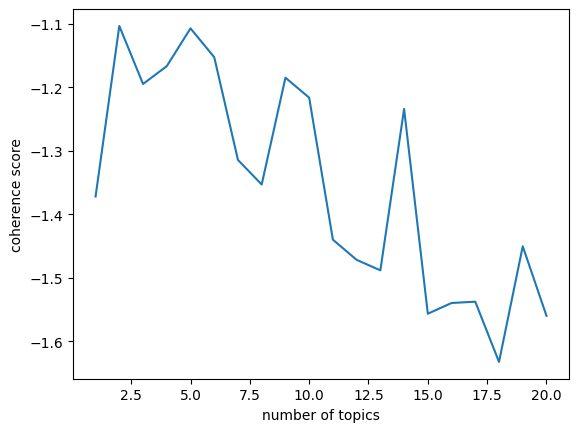

In [31]:
x = np.arange(1,21)
plt.plot(x, noun_coherences)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.savefig("C:/Users/User/anaconda3/envs/NLP37/news/game/noun_game_coherence.png")
plt.show()

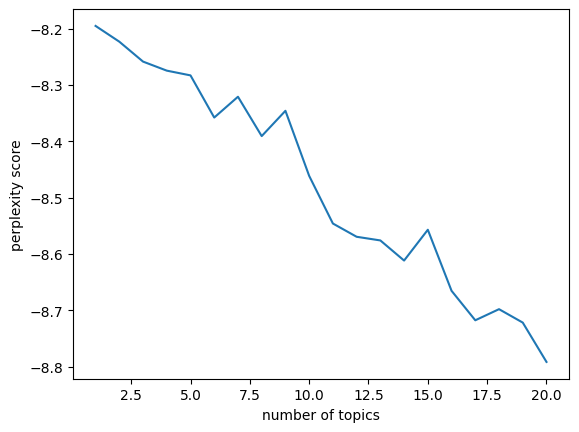

In [33]:
x = np.arange(1,21)
plt.plot(x, noun_perplexities)
plt.xlabel("number of topics")
plt.ylabel("perplexity score")
plt.savefig("C:/Users/User/anaconda3/envs/NLP37/news/game/noun_game_perplexity.png")
plt.show()

In [34]:
noun_lda_model = LdaMulticore(corpus =noun_corpus, num_topics = 5, id2word = noun_dictionary, passes = 1)
topics = noun_lda_model.print_topics()
for topic in topics:
    print(topic)

(0, '0.031*"게임" + 0.008*"규제" + 0.007*"대비" + 0.006*"매출" + 0.005*"산업" + 0.005*"시장" + 0.005*"의견" + 0.004*"증가" + 0.004*"사행" + 0.004*"투자"')
(1, '0.032*"게임" + 0.016*"매출" + 0.009*"대비" + 0.008*"증가" + 0.008*"NHN" + 0.007*"출시" + 0.007*"모바일" + 0.007*"사업" + 0.006*"기록" + 0.006*"전년"')
(2, '0.041*"게임" + 0.011*"규제" + 0.006*"매출" + 0.005*"의견" + 0.005*"모바일" + 0.005*"투자" + 0.004*"매수" + 0.004*"웹보드" + 0.004*"도박" + 0.004*"완화"')
(3, '0.032*"게임" + 0.011*"도박" + 0.011*"매출" + 0.007*"시장" + 0.007*"대비" + 0.006*"모바일" + 0.006*"규제" + 0.005*"불법" + 0.005*"증가" + 0.004*"출시"')
(4, '0.032*"게임" + 0.012*"매출" + 0.008*"규제" + 0.008*"증가" + 0.007*"대비" + 0.005*"결제" + 0.005*"기록" + 0.005*"전년" + 0.005*"모바일" + 0.005*"사업"')


In [146]:
# lda_model_5.show_topic(0, topn = 10)

In [38]:
topic_words = {};

for i in range(5): 
    words = noun_lda_model.show_topic(i, topn = 10)
    topic_words['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
    
noun_topic_table = pd.DataFrame(topic_words)

In [39]:
noun_topic_table

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,게임,게임,게임,게임,게임
1,규제,매출,규제,도박,매출
2,대비,대비,매출,매출,규제
3,매출,증가,의견,시장,증가
4,산업,NHN,모바일,대비,대비
5,시장,출시,투자,모바일,결제
6,의견,모바일,매수,규제,기록
7,증가,사업,웹보드,불법,전년
8,사행,기록,도박,증가,모바일
9,투자,전년,완화,출시,사업


In [41]:
noun_topic_table.to_csv('C:/Users/User/anaconda3/envs/NLP37/news/game/BigKinds_noun_topic_modeling.csv', header=True, index = False,  encoding='cp949')  

lda_display = pyLDAvis.gensim.prepare(lda_model_10, corpus, dictionary, sort_topics = False)
pyLDAvis.display(lda_display)